<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/main/UEFA_Champions_League_2022_23_Best_Forward_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [172]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_gk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [173]:
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals ', 'ball recoveries',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [174]:
# Defining function to renaming multiple columns by index

def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

# Renaming columns using the function
new_column_mapping = {12: 'Offsides', 13: 'Crosses', 14: 'Interceptions', 15: 'Tackles won', 16: 'penalties won', 17: 'penalties comitted', 18: 'own goals', 19:'ball recoveries', 20:'Aerial Duels won', 21: 'Aerial Duels lost', 22: 'Aerial Duels won%'}
df_misc = rename_col_by_index(df_misc, new_column_mapping)
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object')


In [175]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [176]:
print(df_stdstats.columns)
df_stdstats= df_stdstats.rename(columns={'Pos': 'Position'})
print(df_stdstats.columns)

Index(['Player', 'Nationality', 'Pos', 'Club', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')
Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')


In [177]:
dfjoin_fw = [df_passing, df_possession, df_goalsc, df_shooting, df_misc]

# Merge DataFrames with an empty string as suffix for duplicates
import functools as ft

# Merge DataFrames with custom suffixes for duplicates
suffixes = ['_passing', '_possession', '_goalsc', '_shooting']

# Define a function to merge with a specific suffix
def merge_with_suffix(left, right, suffix):
    return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

# Use functools.partial to create a partially applied function
merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffixes[0])

# Apply the merge function iteratively to the list of DataFrames
df_fw = ft.reduce(merge_with_suffix_partial, dfjoin_fw[1:], dfjoin_fw[0])

# Drop duplicate columns with original suffixes
columns_to_drop = [col for col in df_fw.columns if col.endswith(('_passing', '_possession', '_goalsc', '_shooting', '_misc'))]
df_fw = df_fw.drop(columns=columns_to_drop)

In [178]:
print(df_fw.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %',
       ...
       'Crosses', 'Interceptions', 'Tackles won', 'penalties won',
       'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object', length=102)


In [179]:
df_fw['Non-penalty goals minus non-penalty expected goals'] = pd.to_numeric(df_fw['Non-penalty goals minus non-penalty expected goals'], errors='coerce')

df_fw['Non-penalty goals minus non-penalty expected goals'] = df_fw['Non-penalty goals minus non-penalty expected goals'].astype(float)

In [180]:
cf_metrics = [
    'SCA/90',
    'SCA(Sh)',
    'Goals',
    'Shots on target',
    'Shots on target %',
    'Shots Total/90',
    'Shots on target/90',
    'Goals/shot on target',
    'Non-penalty expected goals',
    'non-penalty expected goals/shot',
    'Goals minus expected goals',
    'Non-penalty goals minus non-penalty expected goals',
    'Expected Assist Goals (xAG)',
    'Carries into penalty area',
    'Key Passes',
    'Aerial Duels won'
]

In [181]:
wf_metrics = [
    'SCA',
    'SCA/90',
    'SCA (PassLive)',
    'SCA (TO)',
    'GCA/90',
    'GCA (TO)',
    'Touches (Att 3rd)',
    'Take-ons completed',
    'successful takeon (%)',
    'Times tackled during takeon',
    'Carries into final third',
    'Carries into penalty area',
    'Miscontrols',
    'Dispossessed',
    'Goals',
    'Shots on target/90',
    'Non-penalty expected goals',
    'Non-penalty goals minus non-penalty expected goals',
    'Assists',
    'Expected Assist Goals (xAG)',
    'A-xAG',
    'Key Passes',
    'Passes into Penalty Area'
]

In [182]:
def process_player_data(df, position, metrics):
    """
    Filters and processes player data for a given position.

    Args:
    df (DataFrame): The input DataFrame containing player data.
    position (str): The position of players to filter (e.g., 'FW').
    metrics (list): List of metrics/columns to include in the output.

    Returns:
    DataFrame: Processed DataFrame for the given position.
    """
    # Filter and fill missing values

    # Filter the DataFrame based on position and select relevant columns
    df_filtered = df[df['Position'] == position][['Player', 'Position', 'Club'] + metrics]

    # Handle missing values
    df_filtered.fillna(0, inplace=True)

    return df_filtered

# Usage
df_cf = process_player_data(df_fw, 'FW', cf_metrics)
display(df_cf)
df_wf = process_player_data(df_fw, 'FW', wf_metrics)
display(df_wf)

,Player,Position,Club,SCA/90,SCA(Sh),Goals,Shots on target,Shots on target %,Shots Total/90,Shots on target/90,Goals/shot on target,Non-penalty expected goals,non-penalty expected goals/shot,Goals minus expected goals,Non-penalty goals minus non-penalty expected goals,Expected Assist Goals (xAG),Carries into penalty area,Key Passes,Aerial Duels won
5,Junior Adamu,FW,RB Salzburg,2.20,0,1,3,60.0,2.21,1.32,0.33,1.3,0.26,-0.3,-0.3,0.4,1,2,4
23,Julián Álvarez,FW,Manchester City,3.61,1,3,6,42.9,2.66,1.14,0.50,2.4,0.17,0.6,0.6,1.0,5,8,4
29,Henrique Araújo,FW,Benfica,20.00,0,1,1,100.0,10.00,10.00,1.00,0.2,0.23,0.8,0.8,0.1,0,2,1
32,Hákon Arnar Haraldsson,FW,FC Copenhagen,2.11,1,1,4,50.0,2.42,1.21,0.25,1.0,0.12,0.0,0.0,0.2,1,1,0
38,Pierre-Emerick Aubameyang,FW,Chelsea,1.79,1,2,8,53.3,3.35,1.79,0.25,2.3,0.15,-0.3,-0.3,0.5,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Mathys Tel,FW,Bayern Munich,2.47,0,0,1,14.3,4.34,0.62,0.00,0.6,0.09,-0.6,-0.6,0.1,4,2,3
701,Dušan Vlahović,FW,Juventus,1.97,6,1,7,46.7,3.28,1.53,0.14,2.6,0.20,-1.6,-1.6,0.9,1,1,3
708,Timo Werner,FW,RB Leipzig,2.16,1,2,6,46.2,2.34,1.08,0.33,2.4,0.19,-0.4,-0.4,0.7,10,7,0
715,Roman Yaremchuk,FW,Club Brugge,0.80,0,0,1,33.3,2.41,0.80,0.00,0.5,0.17,-0.5,-0.5,0.0,2,1,2


,Player,Position,Club,SCA,SCA/90,SCA (PassLive),SCA (TO),GCA/90,GCA (TO),Touches (Att 3rd),...,Dispossessed,Goals,Shots on target/90,Non-penalty expected goals,Non-penalty goals minus non-penalty expected goals,Assists,Expected Assist Goals (xAG),A-xAG,Key Passes,Passes into Penalty Area
5,Junior Adamu,FW,RB Salzburg,5,2.20,5,0,0.44,0,38,...,6,1,1.32,1.3,-0.3,1,0.4,0.6,2,2
23,Julián Álvarez,FW,Manchester City,19,3.61,14,1,0.76,0,106,...,6,3,1.14,2.4,0.6,2,1.0,1.0,8,4
29,Henrique Araújo,FW,Benfica,2,20.00,2,0,0.00,0,7,...,0,1,10.00,0.2,0.8,0,0.1,-0.1,2,1
32,Hákon Arnar Haraldsson,FW,FC Copenhagen,7,2.11,4,0,0.00,0,50,...,2,1,1.21,1.0,0.0,0,0.2,-0.2,1,1
38,Pierre-Emerick Aubameyang,FW,Chelsea,8,1.79,7,0,0.22,0,73,...,5,2,1.79,2.3,-0.3,1,0.5,0.5,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Mathys Tel,FW,Bayern Munich,4,2.47,3,0,0.00,0,37,...,3,0,0.62,0.6,-0.6,0,0.1,-0.1,2,0
701,Dušan Vlahović,FW,Juventus,9,1.97,3,0,0.22,0,61,...,8,1,1.53,2.6,-1.6,1,0.9,0.1,1,1
708,Timo Werner,FW,RB Leipzig,12,2.16,10,0,0.54,0,128,...,12,2,1.08,2.4,-0.4,2,0.7,1.3,7,8
715,Roman Yaremchuk,FW,Club Brugge,1,0.80,1,0,0.00,0,25,...,4,0,0.80,0.5,-0.5,0,0.0,0.0,1,0


<ipython-input-183-9a9eb105198a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


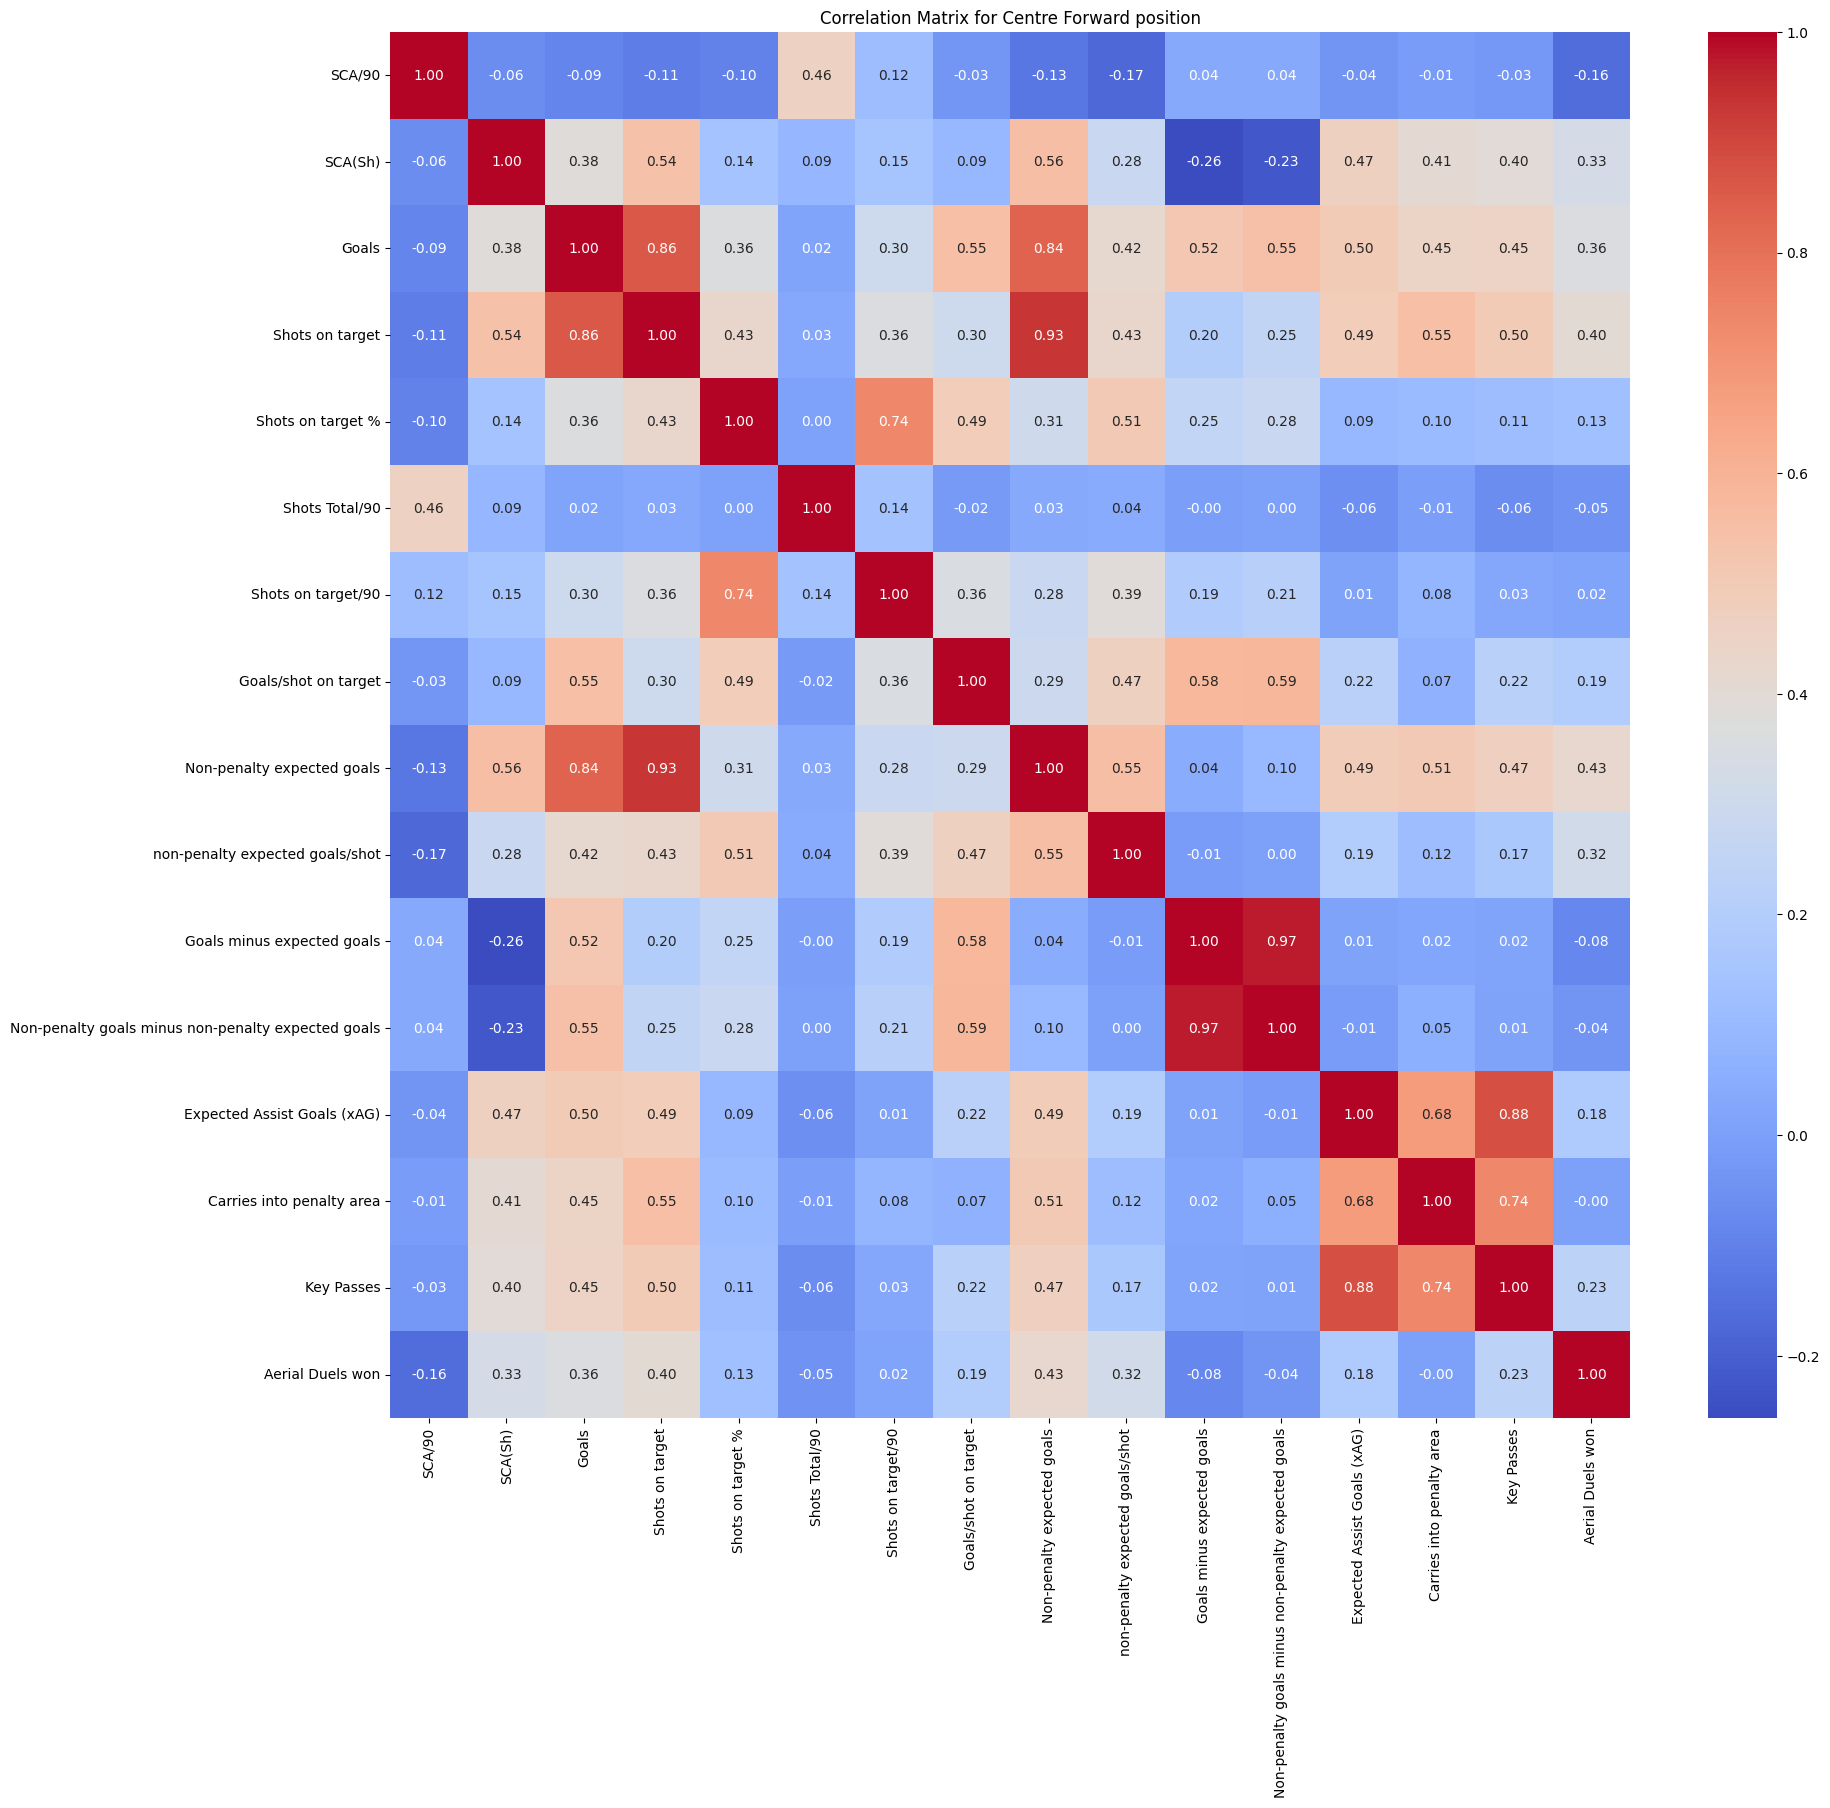

None

In [183]:
#visualization for correlation
def plot_correlation_matrix(data, position_title):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {position_title} position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_cf, 'Centre Forward'))

<ipython-input-183-9a9eb105198a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


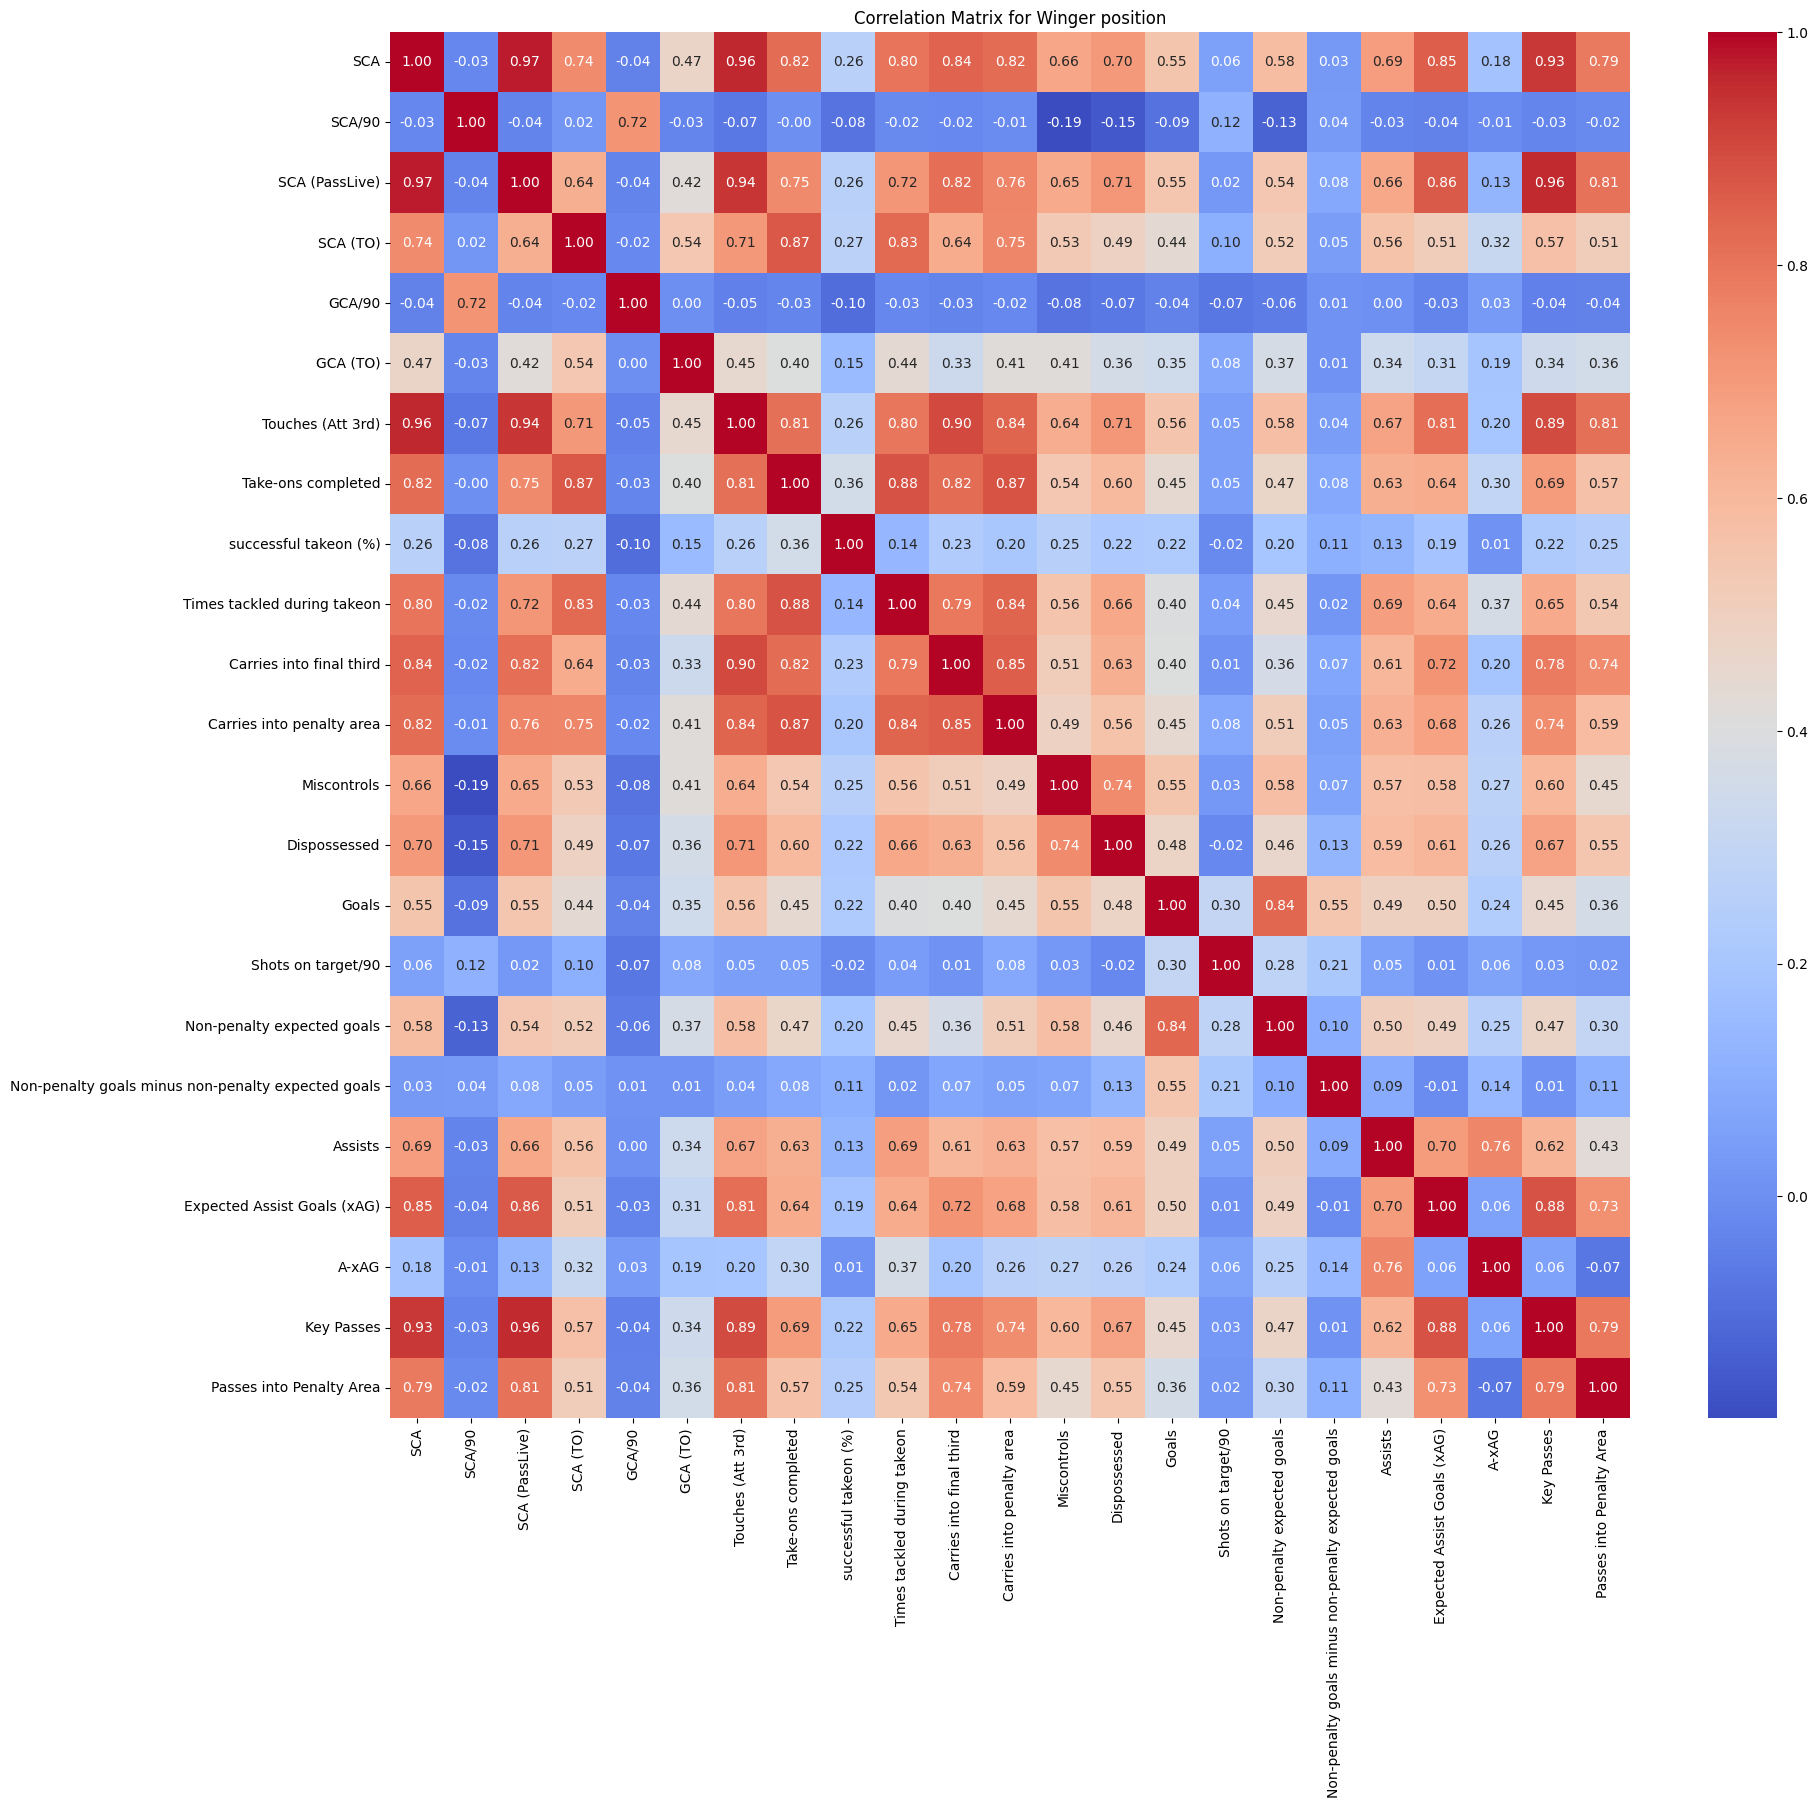

None

In [184]:
# Usage
display(plot_correlation_matrix(df_wf, 'Winger'))

In [185]:
# Define the metrics for analysis
cf_metrics_for_analysis = df_cf.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_cf = df_cf.reset_index(drop=True)

In [186]:
# Define the metrics for analysis
wf_metrics_for_analysis = df_wf.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_wf = df_wf.reset_index(drop=True)

In [187]:
#Function for Normalizing and Applying Weights
def normalize_and_weight(df, metrics, weights):
    # Normalize metrics
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        df[metric] = (df[metric] - min_val) / (max_val - min_val)

    # Apply weights
    for metric in metrics:
        if metric in weights:
            df[metric] *= weights[metric]

    return df

In [188]:
#Function for Standard Scaling
from sklearn.preprocessing import StandardScaler

def standard_scale(df, metrics):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[metrics])
    scaled_df = pd.DataFrame(scaled_data, columns=metrics)
    scaled_df[['Player', 'Position', 'Club']] = df[['Player', 'Position', 'Club']]
    return scaled_df

In [189]:
# Define weights for each metric for CF position
cf_metric_weights = {
    'GCA/90': 10,
    'GCA (Sh)': 10,
    'Goals': 30,
    'Shots on target': 20,
    'Shots on target %': 15,
    'Shots Total/90': 15,
    'Shots on target/90': 15,
    'Goals/shot on target': 20,
    'Non-penalty expected goals': 15,
    'non-penalty expected goals/shot': 15,
    'Goals minus expected goals': 10,
    'Non-penalty goals minus non-penalty expected goals': 10,
    'Expected Assist Goals (xAG)': 7,
    'Carries into penalty area': 6,
    'Key Passes': 8,
    'Aerial Duels won': 12
}

In [190]:
# Define weights for each metric for WF position
wf_metric_weights = {
    'SCA': 10,
    'SCA/90': 15,
    'SCA (PassLive)': 10,
    'SCA (TO)': 15,
    'GCA/90': 10,
    'GCA (TO)': 15,
    'Touches (Att 3rd)': 10,
    'Take-ons completed': 15,
    'successful takeon (%)': 12,
    'Times tackled during takeon': 5,
    'Carries into final third': 10,
    'Carries into penalty area': 12,
    'Miscontrols': -5,
    'Dispossessed': -5,
    'Goals': 30,
    'Shots on target/90': 15,
    'Non-penalty expected goals': 15,
    'Non-penalty goals minus non-penalty expected goals': 20,
    'Assists': 12,
    'Expected Assist Goals (xAG)': 10,
    'A-xAG': 10,
    'Key Passes': 15,
    'Passes into Penalty Area': 12
}

In [191]:
#Applying both methods for data processing
# For Centre Forwards
df_cf_normalized_weighted = normalize_and_weight(df_cf.copy(), cf_metrics, cf_metric_weights)
df_cf_standardized = standard_scale(df_cf, cf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_cf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_cf_normalized_weighted.head())

Standard Scaler DataFrame:
     SCA/90   SCA(Sh)     Goals  Shots on target  Shots on target %  \
0 -0.301963 -0.762136 -0.212544        -0.179541           0.923062   
1 -0.045012  0.028760  0.741735         0.478776           0.292330   
2  2.941820 -0.762136 -0.212544        -0.618419           2.398459   
3 -0.318365  0.028760 -0.212544         0.039898           0.554213   
4 -0.376680  0.028760  0.264595         0.917654           0.675933   

   Shots Total/90  Shots on target/90  Goals/shot on target  \
0       -0.133524            0.214798              0.371975   
1       -0.054586            0.073549              0.962964   
2        1.232972            7.026127              2.701165   
3       -0.096686            0.128479              0.093863   
4        0.066451            0.583614              0.093863   

   Non-penalty expected goals  non-penalty expected goals/shot  \
0                    0.039275                         2.154105   
1                    0.770387      

In [192]:
# For Winger
df_wf_normalized_weighted = normalize_and_weight(df_wf.copy(), wf_metrics, wf_metric_weights)
df_wf_standardized = standard_scale(df_wf, wf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_wf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_wf_normalized_weighted.head())

Standard Scaler DataFrame:
        SCA    SCA/90  SCA (PassLive)  SCA (TO)    GCA/90  GCA (TO)  \
0 -0.511899 -0.301963       -0.323162 -0.526596 -0.068670 -0.385402   
1  0.749420 -0.045012        0.791578  0.089633  0.006421 -0.385402   
2 -0.782181  2.941820       -0.694742 -0.526596 -0.171920 -0.385402   
3 -0.331710 -0.318365       -0.447022 -0.526596 -0.171920 -0.385402   
4 -0.241616 -0.376680       -0.075442 -0.526596 -0.120295 -0.385402   

   Touches (Att 3rd)  Take-ons completed  successful takeon (%)  \
0          -0.470128           -0.480402              -0.267921   
1           0.427182           -0.190845              -0.086380   
2          -0.879196           -0.625181              -1.175625   
3          -0.311779           -0.046066               1.246128   
4          -0.008277           -0.625181              -1.175625   

   Times tackled during takeon  ...  Non-penalty expected goals  \
0                    -0.237356  ...                    0.039275   
1        

In [193]:
def calculate_top_players(df, metrics):
    """
    Calculate and return the top n players based on total score.

    :param df: DataFrame containing player data
    :param metrics: list of metric columns to consider for total score
    :param top_n: number of top players to return
    :return: DataFrame with top n players
    """
    # Calculate total score
    df['total_score'] = df[metrics].sum(axis=1)

    # Sort by total score in descending order
    return df.sort_values(by='total_score', ascending=False)

# Calculate top CFs using Standard Scaler
top_cf_standardized = calculate_top_players(df_cf_standardized, cf_metrics_for_analysis)

# Calculate top CFs using Weighted Metrics
top_cf_weighted = calculate_top_players(df_cf_normalized_weighted, cf_metrics_for_analysis)

# Display the top 5 centre forwards for each method
print("Top 5 Centre Forwards - StandardScaler Method:")
print(top_cf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Centre Forwards - Weighted Metrics Method:")
print(top_cf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Centre Forwards - StandardScaler Method:
              Player Position             Club  total_score
38    Erling Haaland       FW  Manchester City    25.681642
43   Vinicius Júnior       FW      Real Madrid    25.511850
91     Mohamed Salah       FW        Liverpool    23.365280
65     Kylian Mbappé       FW        Paris S-G    18.672234
103     Mehdi Taremi       FW            Porto    15.156605

Top 5 Centre Forwards - Weighted Metrics Method:
             Player Position             Club  total_score
38   Erling Haaland       FW  Manchester City   122.793263
43  Vinicius Júnior       FW      Real Madrid    97.676808
91    Mohamed Salah       FW        Liverpool    97.335973
65    Kylian Mbappé       FW        Paris S-G    86.387181
80   Victor Osimhen       FW           Napoli    80.980189


In [194]:
# Calculate top WFs using Standard Scaler
top_wf_standardized = calculate_top_players(df_wf_standardized, wf_metrics_for_analysis)

# Calculate top WFs using Weighted Metrics
top_wf_weighted = calculate_top_players(df_wf_normalized_weighted, wf_metrics_for_analysis)

# Display the top 5 wingers for each method
print("Top 5 Wingers - StandardScaler Method:")
print(top_wf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Wingers - Weighted Metrics Method:")
print(top_wf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Wingers - StandardScaler Method:
                   Player Position             Club  total_score
43        Vinicius Júnior       FW      Real Madrid    67.214009
51  Khvicha Kvaratskhelia       FW           Napoli    46.193924
65          Kylian Mbappé       FW        Paris S-G    38.083527
37          Jack Grealish       FW  Manchester City    37.425806
91          Mohamed Salah       FW        Liverpool    30.129599

Top 5 Wingers - Weighted Metrics Method:
                   Player Position             Club  total_score
43        Vinicius Júnior       FW      Real Madrid   166.577242
65          Kylian Mbappé       FW        Paris S-G   130.466445
51  Khvicha Kvaratskhelia       FW           Napoli   124.156917
38         Erling Haaland       FW  Manchester City   113.471406
37          Jack Grealish       FW  Manchester City   110.594761


In [195]:
# Linear transformation function
def linear_transform(x, min_x, max_x, new_min, new_max):
    return (x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min

def combine_and_select_top_players(df_standardized, df_weighted, original_df, metrics, top_n=5):
    """
    Combine scores from standardized and weighted data, and select top n players.

    :param df_standardized: DataFrame with standardized scores
    :param df_weighted: DataFrame with weighted scores
    :param original_df: Original DataFrame with player details
    :param metrics: list of metric columns
    :param top_n: number of top players to return
    :return: DataFrame with top n players based on combined score
    """
    # Find the min and max values for linear transformation
    min_standardized = df_standardized['total_score'].min()
    max_standardized = df_standardized['total_score'].max()
    min_weighted = df_weighted['total_score'].min()
    max_weighted = df_weighted['total_score'].max()

    # Apply linear transformation
    df_weighted['total_score_transformed'] = df_weighted['total_score'].apply(
        lambda x: linear_transform(x, min_weighted, max_weighted, min_standardized, max_standardized)
    )

    # Combine scores
    combined_df = original_df.copy()
    combined_df['score'] = (df_standardized['total_score'] + df_weighted['total_score_transformed']) / 2

    # Select and return top players
    return combined_df.sort_values(by='score', ascending=False)

# Use the function for Centre Forwards
top_cf = combine_and_select_top_players(top_cf_standardized, top_cf_weighted, df_cf, cf_metrics_for_analysis)
print("Top 5 Centre Forwards:")
print(top_cf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Centre Forwards:
             Player             Club Position      score
38   Erling Haaland  Manchester City       FW  25.681642
43  Vinicius Júnior      Real Madrid       FW  21.473450
91    Mohamed Salah        Liverpool       FW  20.344211
65    Kylian Mbappé        Paris S-G       FW  16.200257
2   Henrique Araújo          Benfica       FW  13.440236


In [196]:
# Use the function for Winger
top_wf = combine_and_select_top_players(top_wf_standardized, top_wf_weighted, df_wf, wf_metrics_for_analysis)
print("Top 5 Winger:")
print(top_wf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Winger:
                   Player             Club Position      score
43        Vinicius Júnior      Real Madrid       FW  67.214009
51  Khvicha Kvaratskhelia           Napoli       FW  45.317799
65          Kylian Mbappé        Paris S-G       FW  42.956160
37          Jack Grealish  Manchester City       FW  37.293481
90                Rodrygo      Real Madrid       FW  31.800820


In [197]:
def plot_top_players(df, top_n, position_title, x_label='score', y_label='Player'):
    """
    Create a bar plot for the top N players based on their score.

    :param df: DataFrame containing players and their scores.
    :param top_n: Number of top players to display.
    :param position_title: Title of the position (e.g., 'Centre Forwards').
    :param x_label: Label for the x-axis.
    :param y_label: Label for the y-axis.
    """
    top_players = df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")
    plt.title(f'Top {top_n} {position_title} by {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<ipython-input-197-ca94775d0034>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


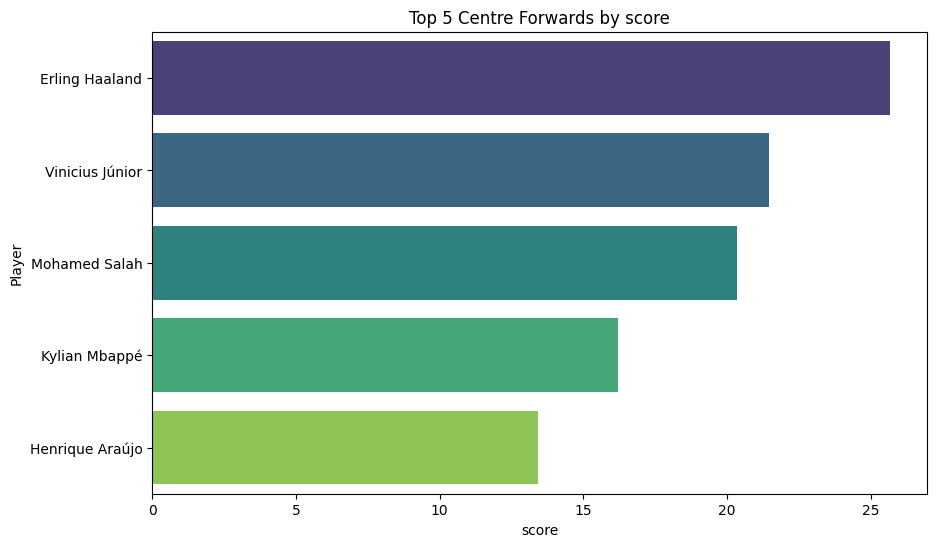

In [198]:
plot_top_players(top_cf, 5, 'Centre Forwards')

<ipython-input-197-ca94775d0034>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


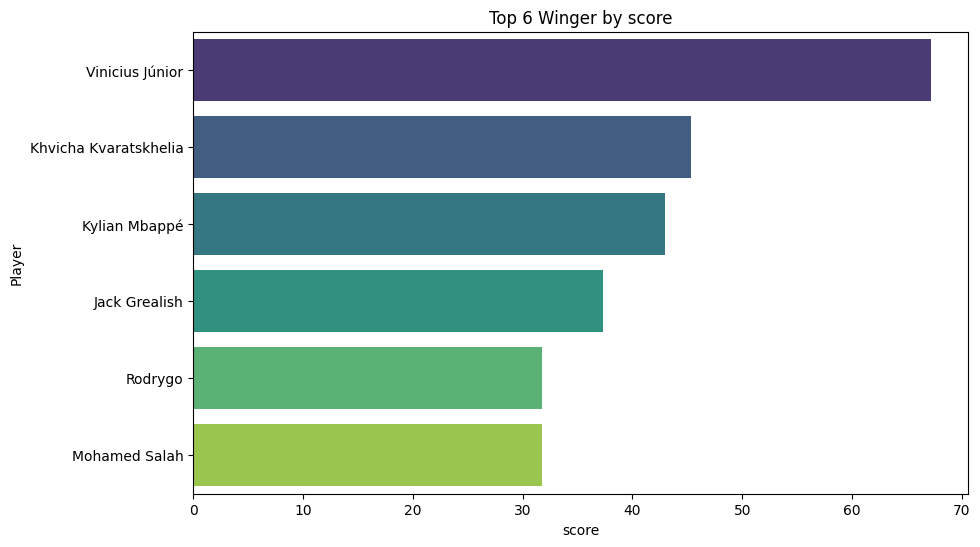

In [199]:
plot_top_players(top_wf, 6, 'Winger')

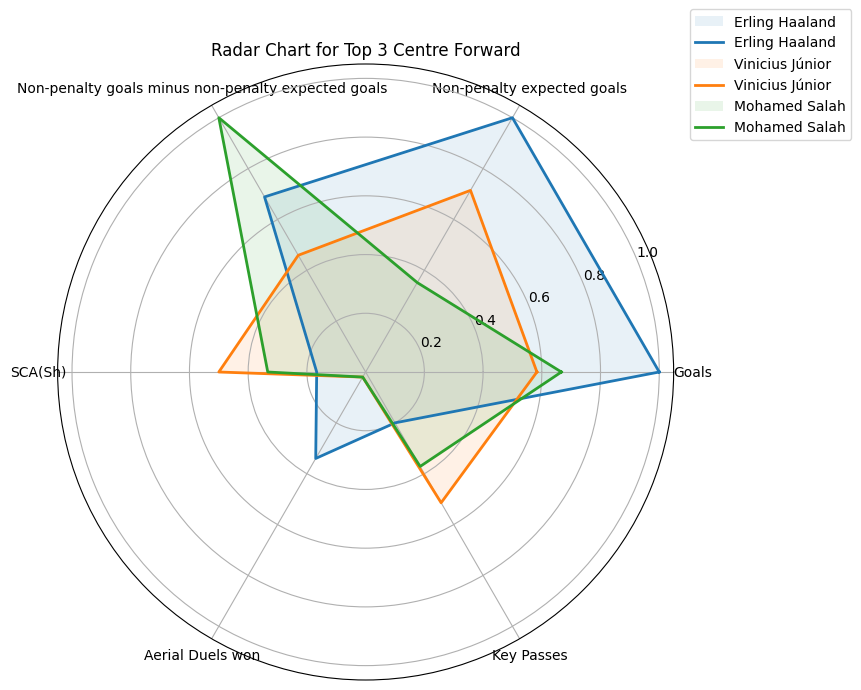

In [200]:
from sklearn.preprocessing import MinMaxScaler

def plot_radar_chart(df, position_title, metrics, top_n=3):
    # Select the top N players
    top_players = df.head(top_n)

    # Extracting the metrics data for scaling
    data_for_scaling = df[metrics]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the data
    scaled_data = scaler.fit_transform(data_for_scaling)

    # Create a DataFrame for the scaled data
    df_scaled = pd.DataFrame(scaled_data, columns=metrics, index=df.index)

    # Now, select the scaled data for the top N players
    top_n_scaled_data = df_scaled.loc[top_players.index]

    # Radar chart setup
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    # Data for radar chart (adding the first metric at the end to close the chart)
    top_n_scaled_data = pd.concat([top_n_scaled_data, top_n_scaled_data.iloc[:, 0]], axis=1)

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(top_players)):
        ax.fill(angles, top_n_scaled_data.iloc[i].values, alpha=0.1, label=top_players.iloc[i]['Player'])
        ax.plot(angles, top_n_scaled_data.iloc[i].values, label=top_players.iloc[i]['Player'], linewidth=2)

    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f'Radar Chart for Top {top_n} {position_title}')

    plt.show()

# Usage for Centre Forwards
plot_radar_chart(top_cf, 'Centre Forward', ['Goals', 'Non-penalty expected goals', 'Non-penalty goals minus non-penalty expected goals', 'SCA(Sh)', 'Aerial Duels won', 'Key Passes'], top_n=3)

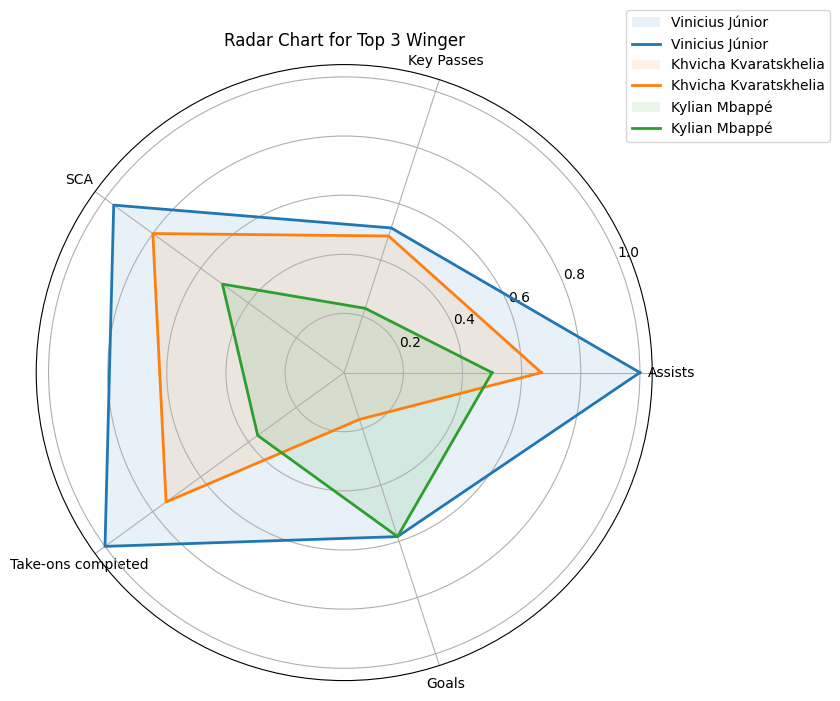

In [201]:
# Plot radar chart usage for Full Backs
plot_radar_chart(top_wf, 'Winger', ['Assists', 'Key Passes', 'SCA', 'Take-ons completed', 'Goals'], top_n=3)

In [202]:
def select_top_n_players(df, position, n):
    # Assuming 'score' is the column representing the performance score
    top_2_players = df[df['Position'] == position].nlargest(n, 'score')
    return top_2_players[['Player', 'Club', 'Position', 'score']]

# Example usage for Centre Backs (CB)
top_1_cf = select_top_n_players(top_cf, 'FW', 1)
print("Top Centre Forwards:")
print(top_1_cf)

# Example usage for Full Backs (FB)
top_2_wf = select_top_n_players(top_wf, 'FW', 2)
print("\nTop 2 Wingers:")
print(top_2_wf)

Top Centre Forwards:
            Player             Club Position      score
38  Erling Haaland  Manchester City       FW  25.681642

Top 2 Wingers:
                   Player         Club Position      score
43        Vinicius Júnior  Real Madrid       FW  67.214009
51  Khvicha Kvaratskhelia       Napoli       FW  45.317799
